In [93]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft
from functools import partial
from scipy import signal
%matplotlib inline

In [94]:
#plt.rcParams['figure.figsize'] = [11, 13]
#plt.rcParams['figure.dpi'] = 100

In [95]:
def showPlots(plots):
    colors = ['#06d6a0', '#277da1', '#ee6c4d','#5a189a','#f3722c']
    plotCount = 0
    
    for i in range(len(plots)):
        if 'same' not in plots[i] or plots[i]['same'] == False:
            plotCount+=1
            
    fig, axs = plt.subplots(plotCount)
    pid = 0
    for i in range(len(plots)):
        if 'same' in plots[i] and plots[i]['same'] == True and pid > 0:
            pid -= 1            
        if 'x' not in plots[i]:
            axs[pid].plot(plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        else:
            axs[pid].plot(plots[i]['x'][:len(plots[i]['data'])], plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        axs[pid].grid()
        axs[pid].legend(loc = 'upper right')
        
        pid+=1

In [129]:
x_step = 0.1 #x-step
t_step = 0.1 #time step
max_x = 1
max_t = 1

w = int(max_x/x_step)
h = int(max_t/t_step)

T1 = 10
T2 = 10
T0 = 0.5

temperatures = []
for i in range(h):
    new = []
    for j in range(w):
        new.append(0)
    temperatures.append(new)

for i in range(h):
    temperatures[i][0] = T1 + (T2-T1)*(i/(h-1))
#temperatures[0][w-1] = T0

In [130]:
#temperatures

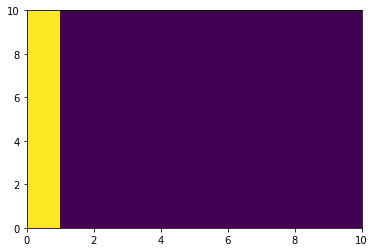

In [131]:
plt.pcolormesh(temperatures)
#print(temperatures[3][0])

In [132]:
visited = []
for i in range(h):
    new = []
    for j in range(w):
        new.append(0)
    visited.append(new)
    
def getTemp(x, t):
    #print(str(x)+" "+str(t))
    if x < 0 or x >= w or t < 0 or t >= h:
        return T0
    if x == 0:
        return temperatures[t][x]
    #if t == 0 and x == w-1:
    #    return temperatures[t][x]
    #print(x)
    #(-(x_step**2)*getTemp(x, t+1)+t_step*getTemp(x+1, t)+t_step*getTemp(x-1, t))/(2*t_step-x_step**2)
    return (x_step**2)/t_step*(getTemp(x-1, t+1)-getTemp(x-1, t))+2*getTemp(x-1, t)-getTemp(x-2, t)

In [133]:
getTemp(1,0)

19.5

In [134]:
for i in range(w):#x
    for j in range(h):#t
        temperatures[j][i] = getTemp(i,j)

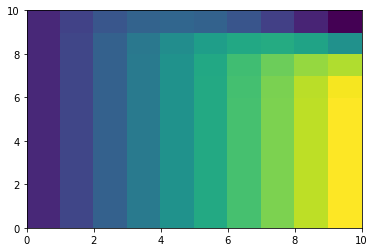

In [135]:
plt.pcolormesh(temperatures)

In [128]:
temperatures

[[10.0,
  19.394444444444446,
  28.577777777777783,
  37.44444444444445,
  45.8888888888889,
  53.80555555555558,
  61.08888888888892,
  67.63333333333335,
  73.33333333333333,
  78.08333333333329],
 [8.944444444444445,
  17.283333333333335,
  25.41111111111112,
  33.22222222222223,
  40.61111111111112,
  47.47222222222223,
  53.699999999999996,
  59.18888888888887,
  63.83333333333329,
  67.52777777883327],
 [7.888888888888889,
  15.172222222222222,
  22.244444444444444,
  28.999999999999993,
  35.333333333333314,
  41.138888888888864,
  46.311111111111074,
  50.74444444444439,
  54.33333334388881,
  56.972222404833225],
 [6.833333333333334,
  13.061111111111112,
  19.077777777777776,
  24.77777777777777,
  30.055555555555543,
  34.805555555555536,
  38.92222222222219,
  42.300000105555505,
  44.83333495888883,
  46.41667990438882],
 [5.777777777777778,
  10.95,
  15.911111111111108,
  20.55555555555555,
  24.777777777777768,
  28.472222222222207,
  31.53333438888887,
  33.85556980555